# From Chemistry to Quality:Predicting Wine Quality Using Chemical Properties

### Importing Relevant Libraries 

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats import shapiro 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

### Introduction 

The purpose of this project is to experiment with various classification models in order to predict the quality of wine based on past customer ratings and using the following wine chemical properties: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates, and alcohol.

### The dataset 

We are working with two datasets: **winequality_red** and  **winequality_red**. Both datasets contains values related to fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates, alcohol and quality (score between 0 and 10).

Input variables (based on physicochemical tests):

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):

12 - given by the costumers)ality (score be

The datasets was obtained from the UCI Machine Learning Repository.tween 0 and 10)


#### Data Load  and  Understand the dataset structure <a name="subparagraph5"></a>

To begin our analysis, we first need to load the dataset which is available in a CSV format.
Once the dataset is loaded, it is crucial to understand its structure. This includes checking the data types of each column, identifying any missing values, and obtaining basic statistics for numerical features.

In [10]:
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
df_white.shape

(4898, 12)

In [12]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
df_red = pd.read_csv('winequality-red.csv',sep=';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df_red.shape

(1599, 12)

In [15]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Cleaning 

#### Checking for missing values 


In [18]:
# checking for missing values and count the true missing values
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see both dataset do not contain missing values. Let's check if contains dublicates 

#### checking for duplicates

The purpose of searching for duplicates in the data is to identify and resolve any redundant entries in the dataset. Duplicate rows can skew analysis and modeling results by giving undue weight to repeated observations, leading to biased or inaccurate outcomes.

In [23]:
#counting all duplicates in the white wine dataset
df_white.duplicated().sum()

937

In [24]:
#check the duplicates in the white wine dataset
df_white[df_white.duplicated()]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [25]:
#counting the duplicates in the red wine dataset
df_red.duplicated().sum()

240

In [26]:
# check the duplicates in the red wine dataset
df_red[df_red.duplicated()]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


Since we have duplicates rows in both datasets, I decided to remove them in order to have more reliable analysis and to improve model accuracy and prevent overfitting. 

In [28]:
# removing duplicates from white wine dataset
df_white.drop_duplicates(inplace=True)

In [29]:
#checked if duplicates have been removed 
df_white.shape

(3961, 12)

In [30]:
# removing duplicates from red dataset
df_red.drop_duplicates(inplace=True)

In [31]:
# checked if the duplicates have been removed
df_red.shape

(1359, 12)

To conduct the analysis and train machine learning models, I plan to merge the two datasets. However, before doing so, I will create a new column in both datasets to indicate whether the wine is red or white.

In [33]:
# created the wine colour column with respective wine colour 
df_white['Wine colour'] = np.repeat('white', df_white.shape[0]) 


In [34]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine colour
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [35]:
# created the wine colour column with respective wine colour 
df_red['Wine colour'] = np.repeat('red', df_red.shape[0]) 


In [36]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine colour
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


We can now merge the two datasets into one dataset using ***.concat*** method.

In [38]:
df_white_red = pd.concat([df_red, df_white], ignore_index=True)

In [39]:
df_white_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [40]:
#save the new dataset
df_white_red.to_csv('merged_wines.csv', index=False)


In [41]:
df_white_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Wine colour              object
dtype: object

## Exploratory Data Analysis (EDA)

In this steps we are going to explore the followings: 
- explore descriptive statistics; 
- check for outliers;
- explore the distribution of the chemical properties; 
- explore how costumers rated the wines;
- explore the relationship between the chemical properties;
- explore how the chemical properties are related with wine quality. 

#### Let's explore the descriptive statistics

In [45]:
df_white_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Check for outliers using boxplot

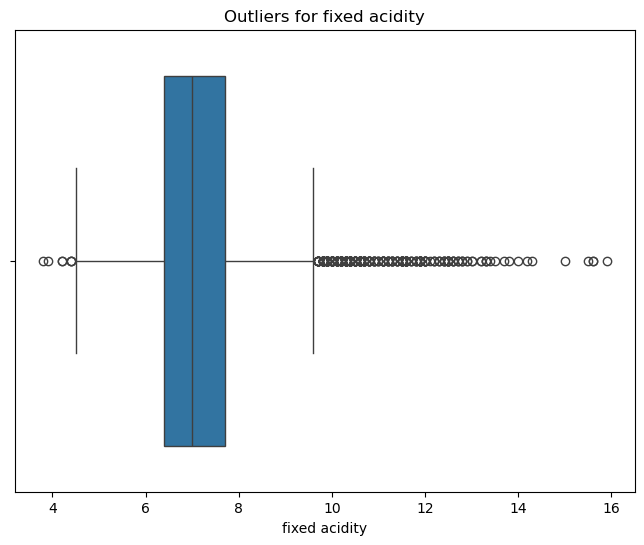

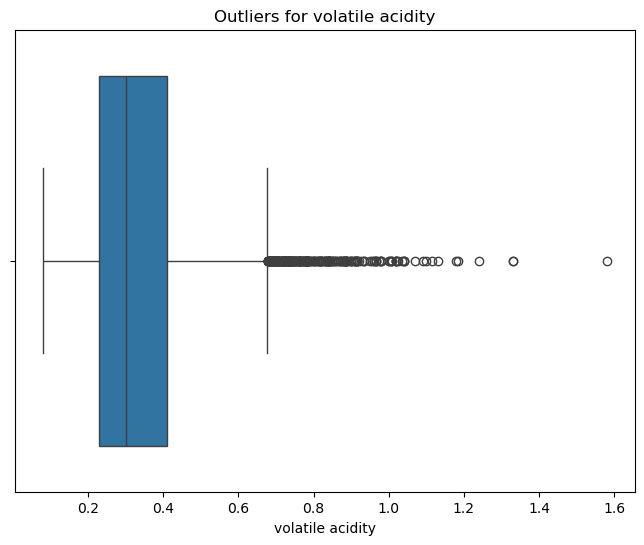

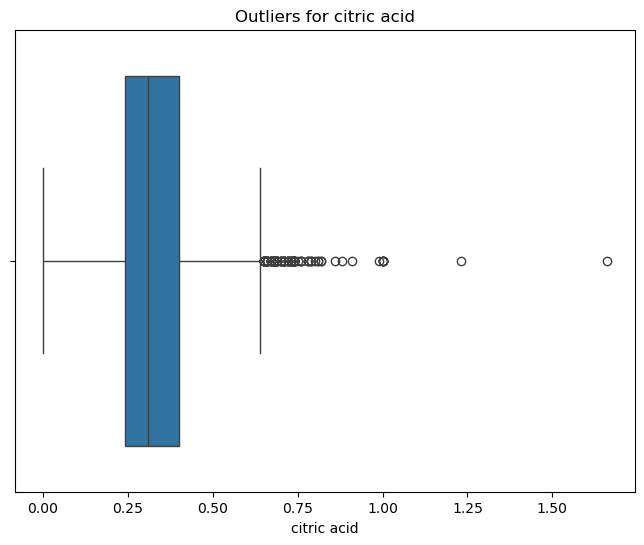

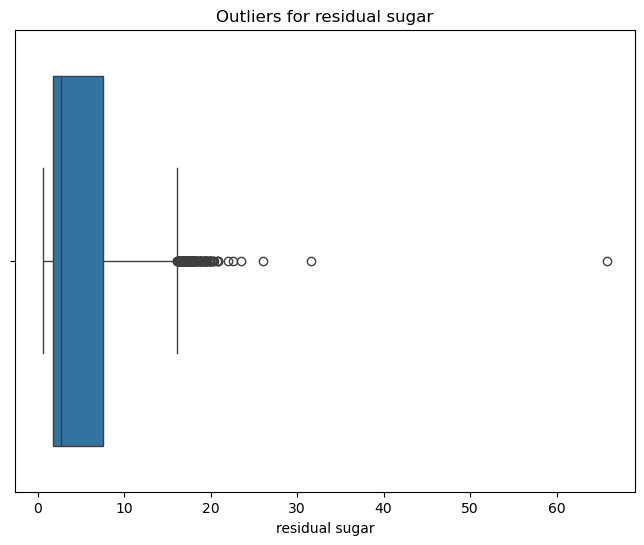

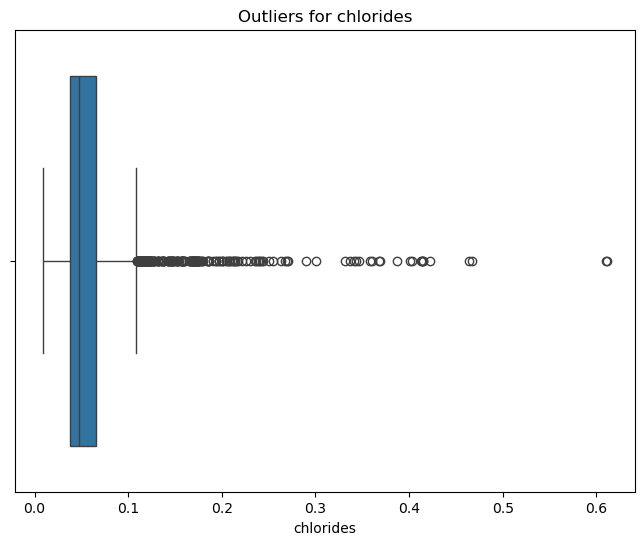

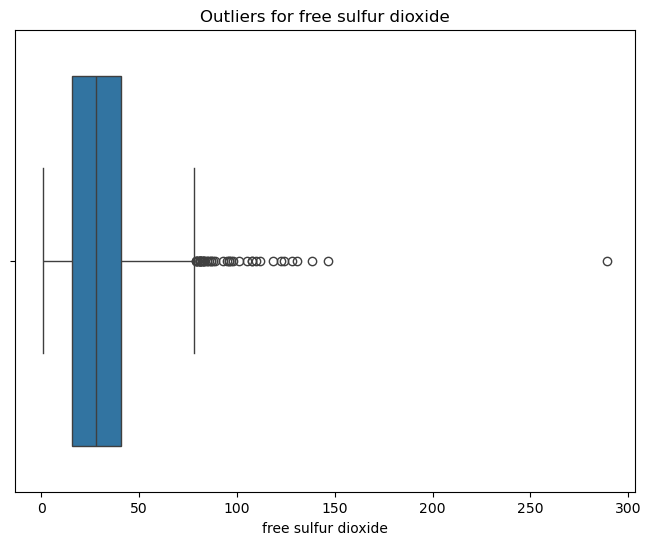

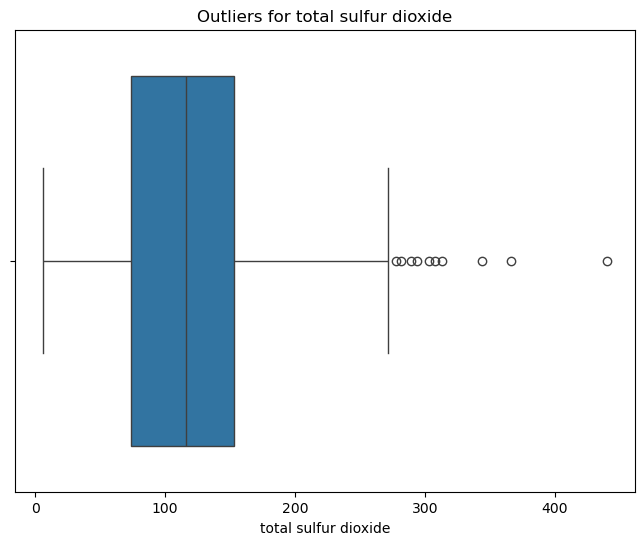

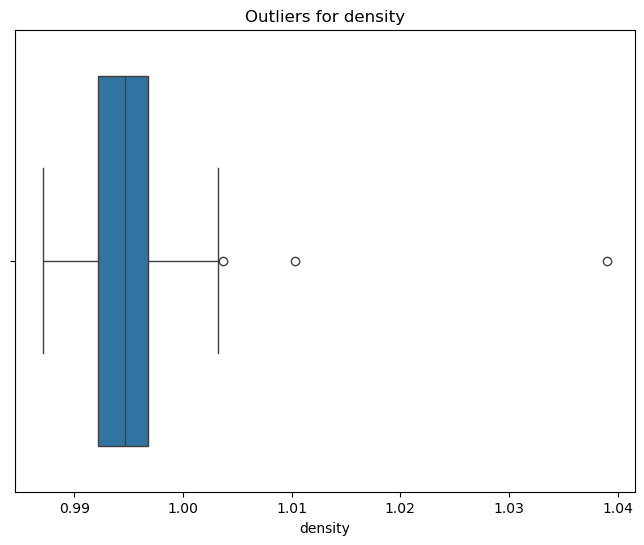

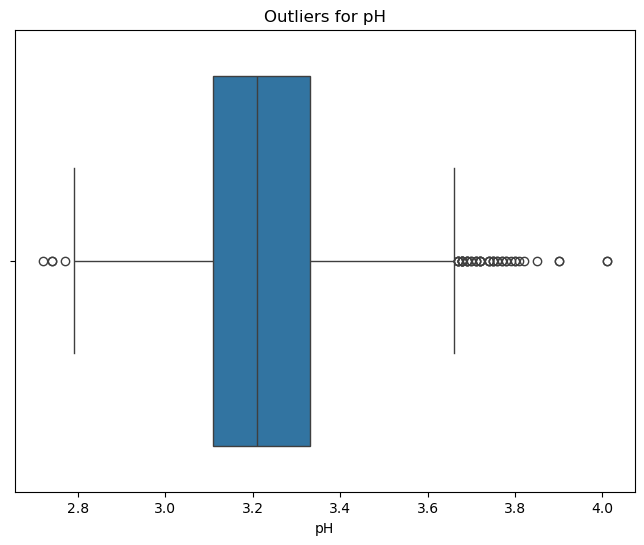

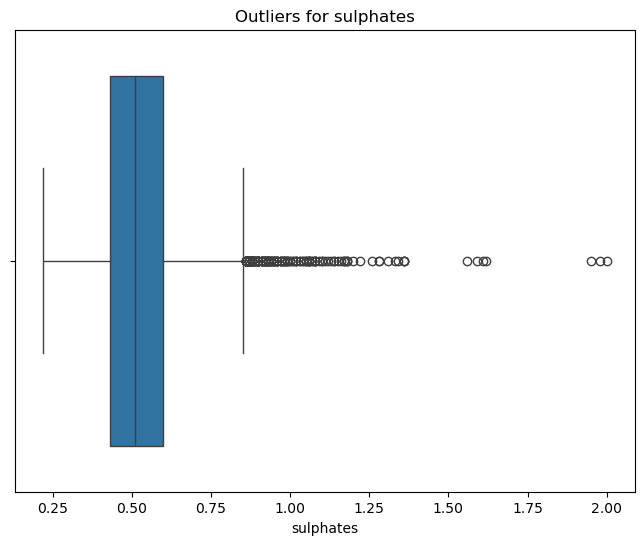

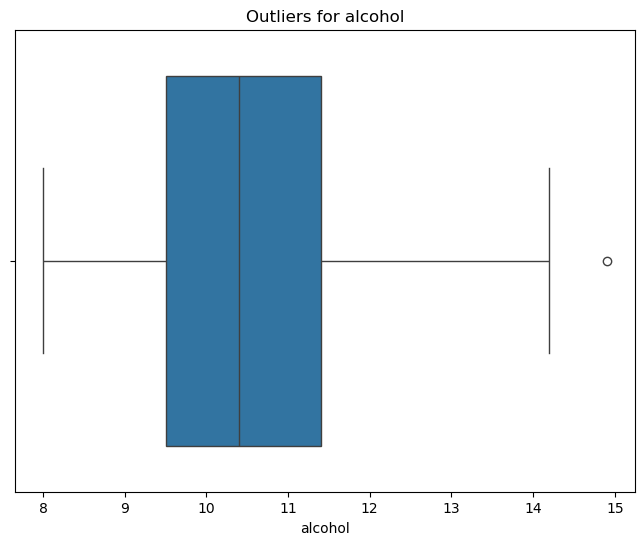

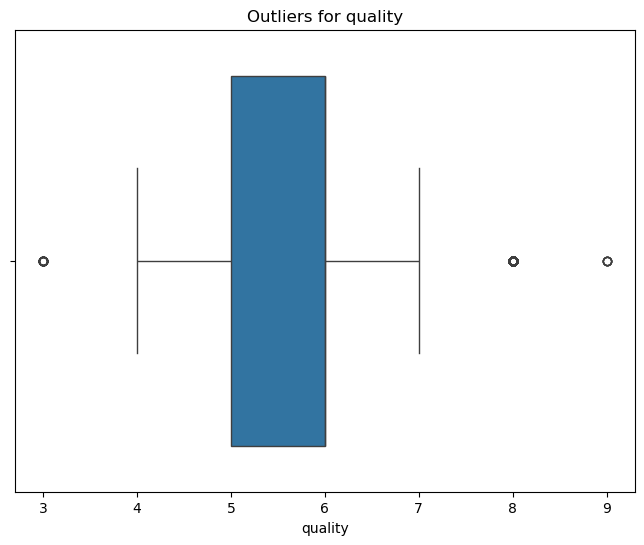

In [47]:
#check for outliers throgh all numerical variables using boxplot 
numerical_var = df_white_red.drop(columns=['Wine colour'])

for var in numerical_var.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=numerical_var[var])  
    plt.title(f'Outliers for {var}')
    plt.xlabel(var)
    plt.show()

#### removing outliers using Zscore in order to improve model perfomance 

In [49]:
from scipy import stats

# remove outliers
df_numerical_var = numerical_var[(np.abs(stats.zscore(numerical_var)) < 3).all(axis=1)]

#### Let's see if our numerical variables are normally distributed using histograms and statistical test

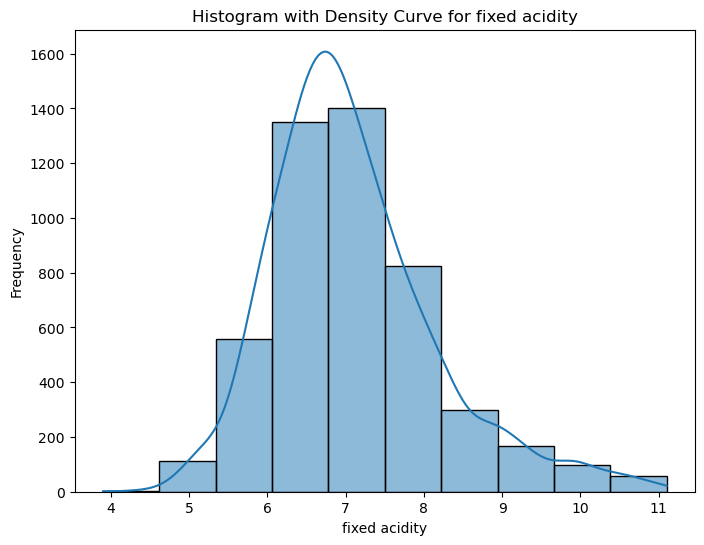

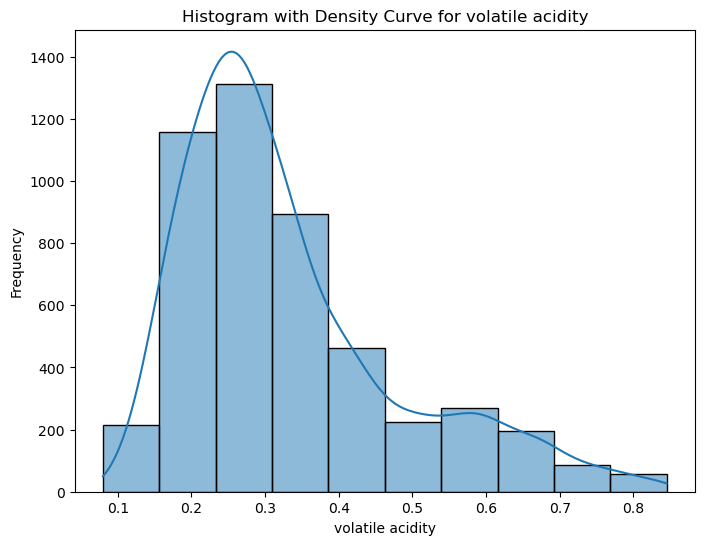

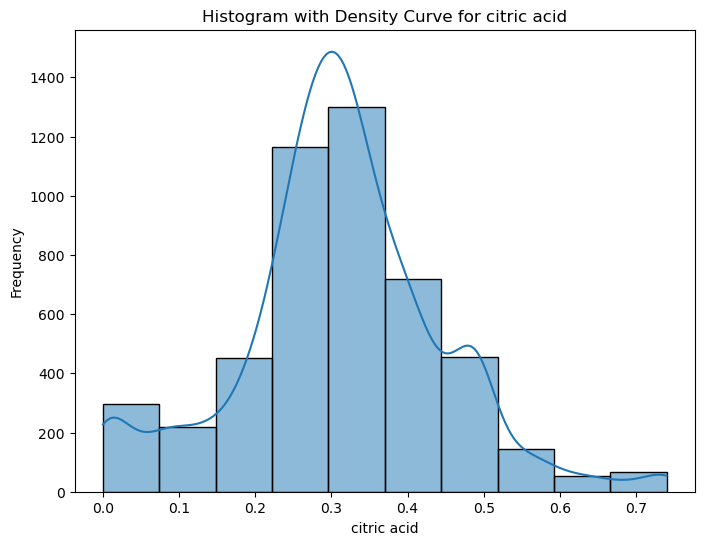

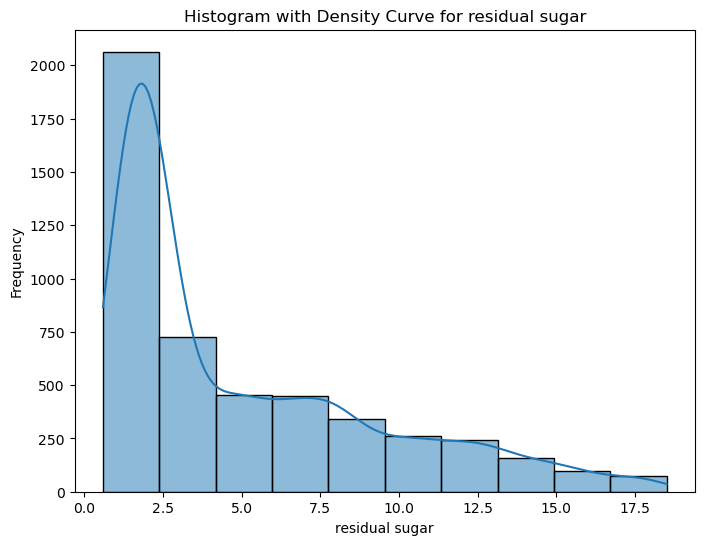

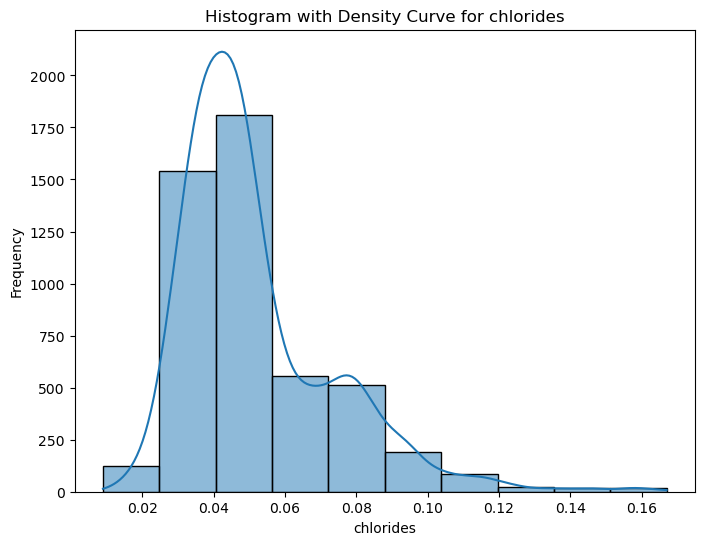

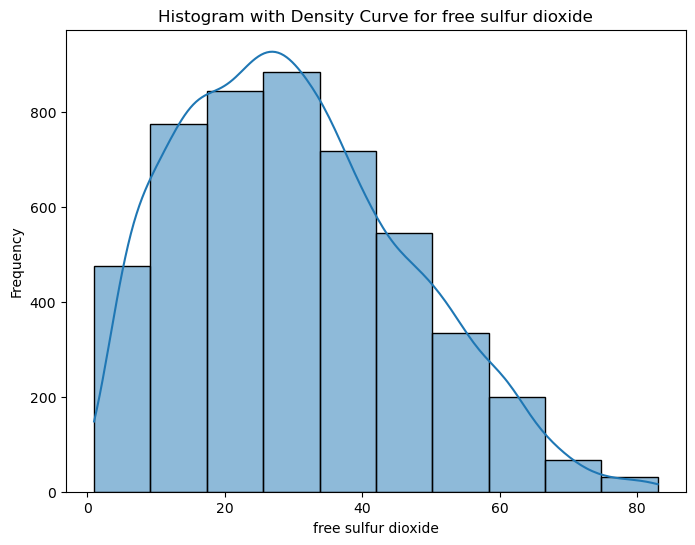

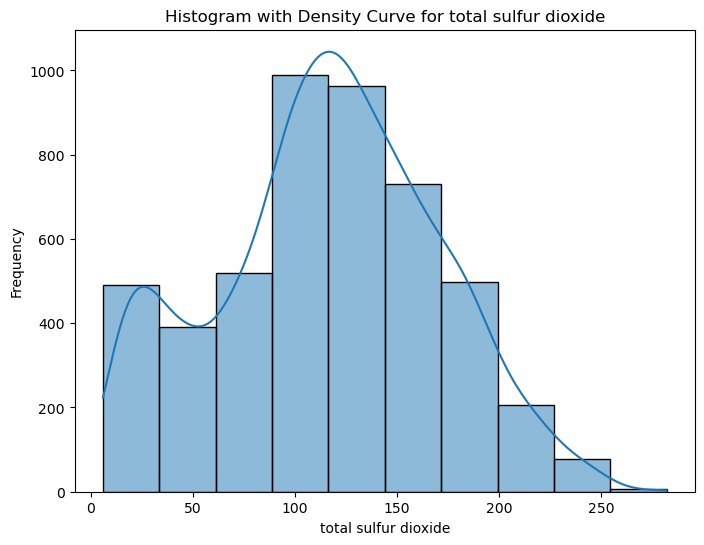

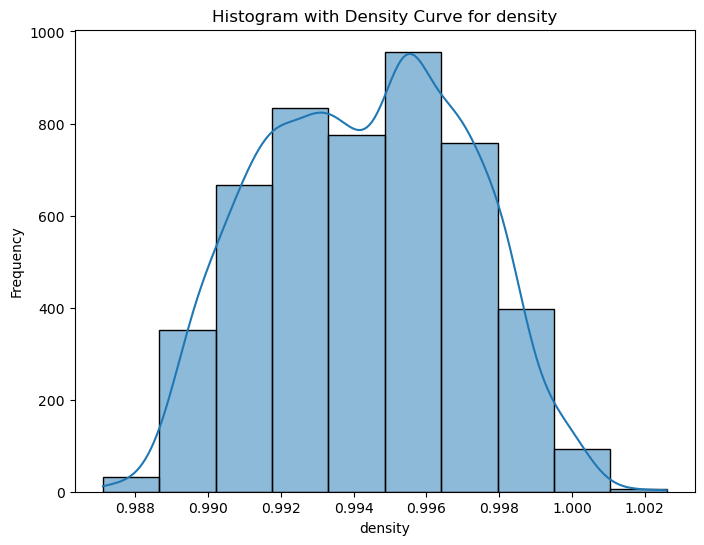

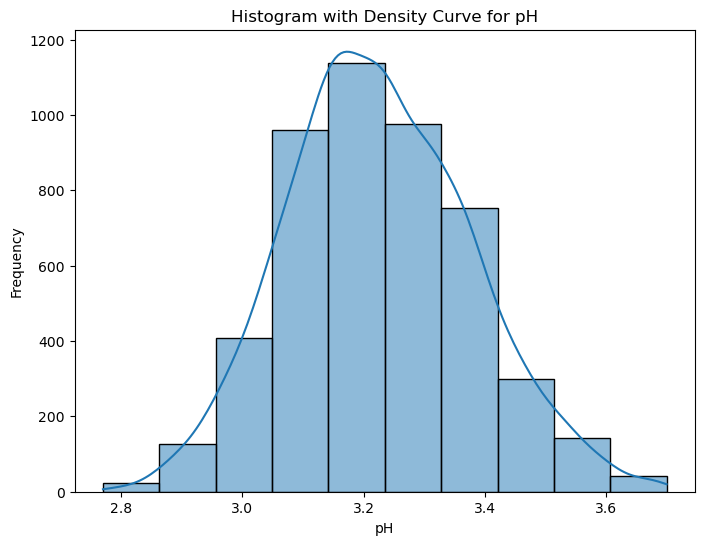

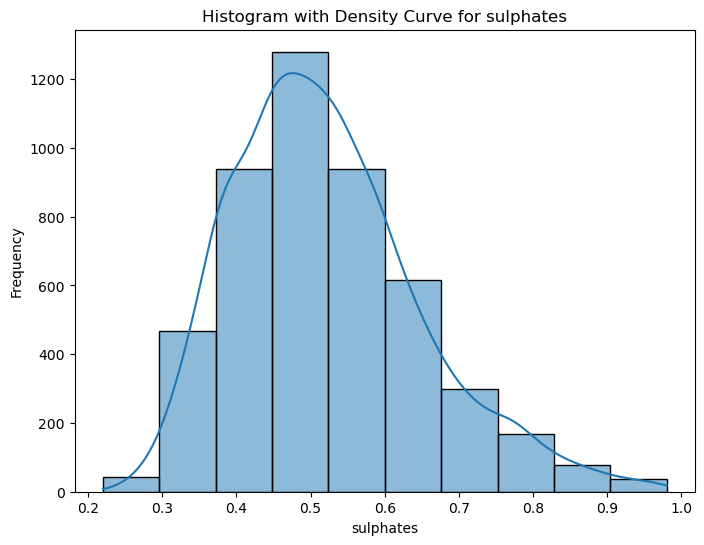

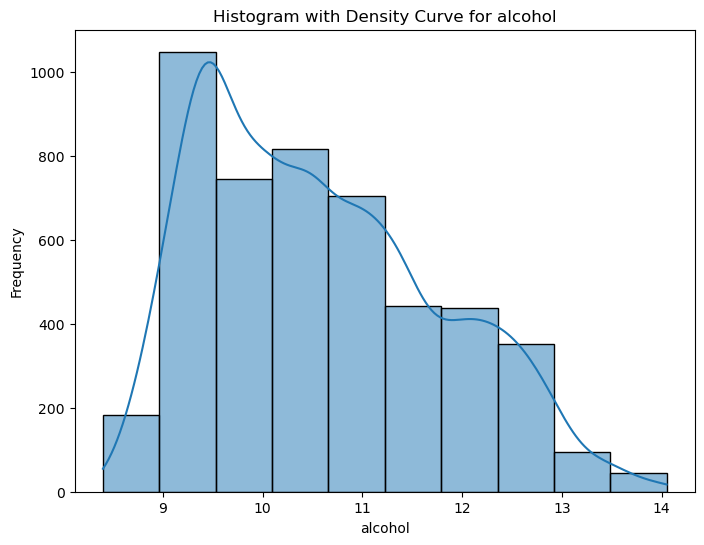

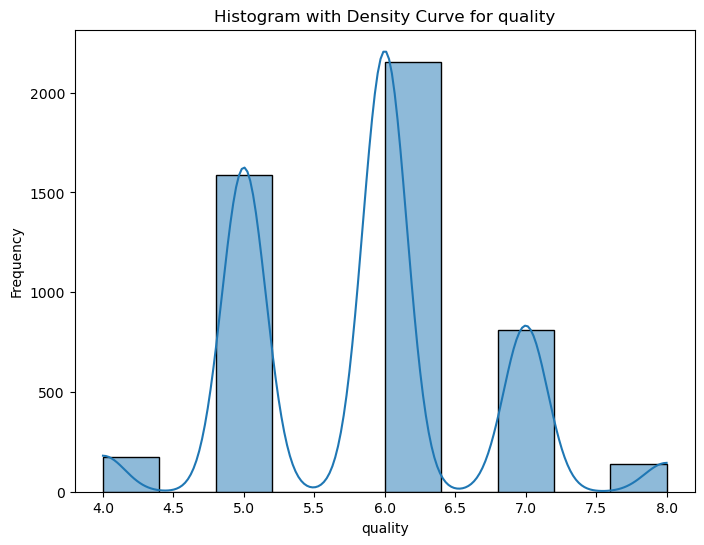

In [51]:
# Histograms with density curve 
# Looped through each numerical variable to create histograms
for var in df_numerical_var:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_numerical_var[var], kde=True, bins=10)  # kde=True adds the density curve
    plt.title(f'Histogram with Density Curve for {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

We can also further evaluate the normality distribution of the numerical variable using a statistical test called Shapiro-Wilk Test. This test  evaluates normality by comparing the observed sample data against the theoretical normal distribution

In [53]:
from scipy.stats import shapiro  # importing the statistical test from scipy.stats

#looping throuhg each variables
for var in df_numerical_var:
    stat, p = shapiro(df_numerical_var[var])  
    print(f'{var}: p-value = {p}')


fixed acidity: p-value = 2.9928386576870854e-37
volatile acidity: p-value = 5.7153990602597405e-49
citric acid: p-value = 4.910601983693785e-28
residual sugar: p-value = 7.353039789981253e-58
chlorides: p-value = 5.0651001944053234e-51
free sulfur dioxide: p-value = 8.87666193407158e-30
total sulfur dioxide: p-value = 2.56188940629852e-21
density: p-value = 4.219087520702321e-22
pH: p-value = 1.5144123234365944e-09
sulphates: p-value = 1.2993933887920926e-31
alcohol: p-value = 1.9034402697555208e-35
quality: p-value = 3.597774068069569e-52


Shapiro-Wilk Test confirms that our continous variables do not follow a normal distriuton

From what it is shown in the histogram, and the result from Shapiro-Wilk Test the numerical variables don't follow a normal distribution, and in the majority of the variables the distribution is right-skewed, indicating a positive association. 

#### Evaluate how consumers rated the wines (both red and white) using a countplot

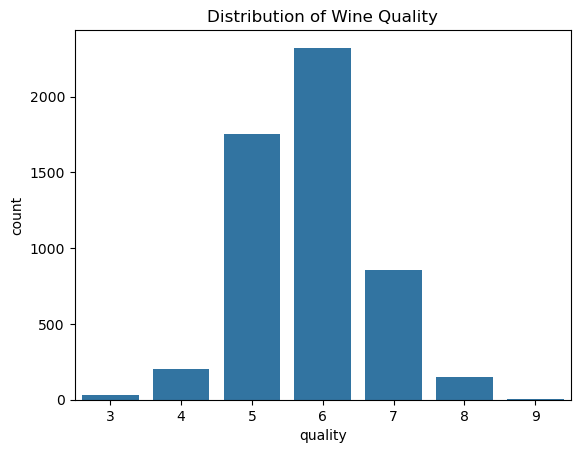

In [57]:
#countplot quality
sns.countplot(x='quality', data=df_white_red)
plt.title('Distribution of Wine Quality')
plt.show()

According to the countplot, the most common ratings were 5 and 6 scores 

### Explore the relationship between the numerical variables 

Using a heatmap correlation coefficient matrix to visually show the correlation between multiple variables. Since data do not follow a normal distribution I will use Spearman's rank correlation coefficient instead of the default Pearson correlation test. 


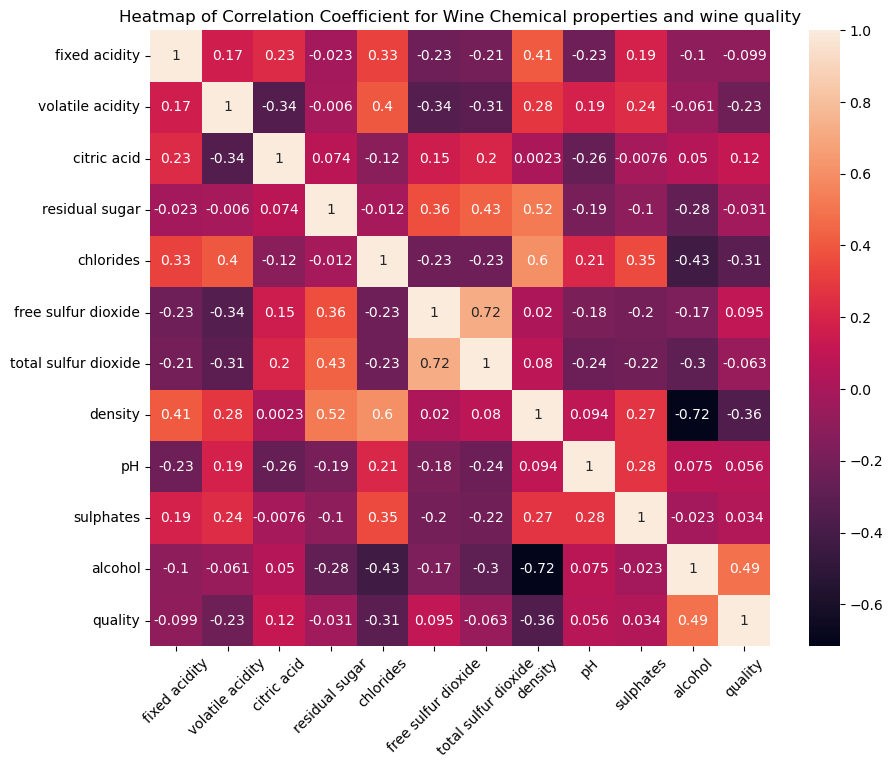

In [61]:
corr =  df_numerical_var.corr(method='spearman')
plt.figure(figsize=[10,8])
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.title("Heatmap of Correlation Coefficient for Wine Chemical properties and wine quality", size=12);

***Interpreting the heatmap:*** 

Positive correlation:

- Alcohol and Quality: The heatmap shows a strong positive correlation indicating that higher alcohol content is generally associated with better wine quality.
- Citric acid also show a moderated positive correlation with quality.


Negative Correlation:
- Chlorides and Volatile acidity vs Quality : A moderate negative correlation here suggests that higher chloride levels and volatile acitdity are associated with lower wine quality



#### Explore the relationship between the chemical properties and quality using Regplot

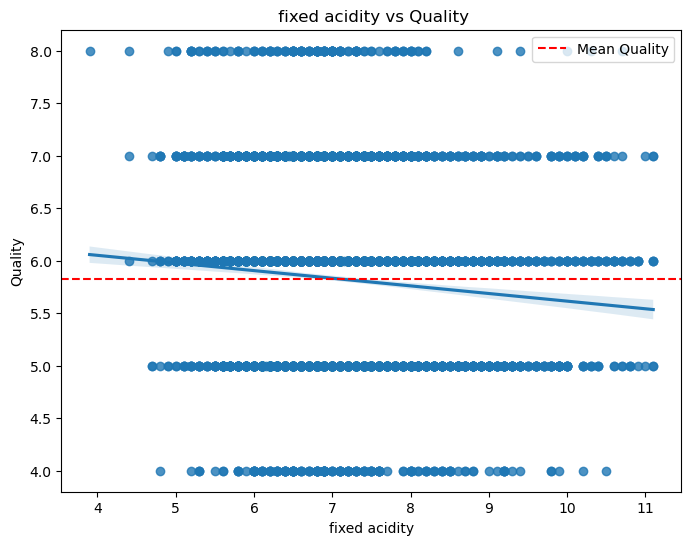

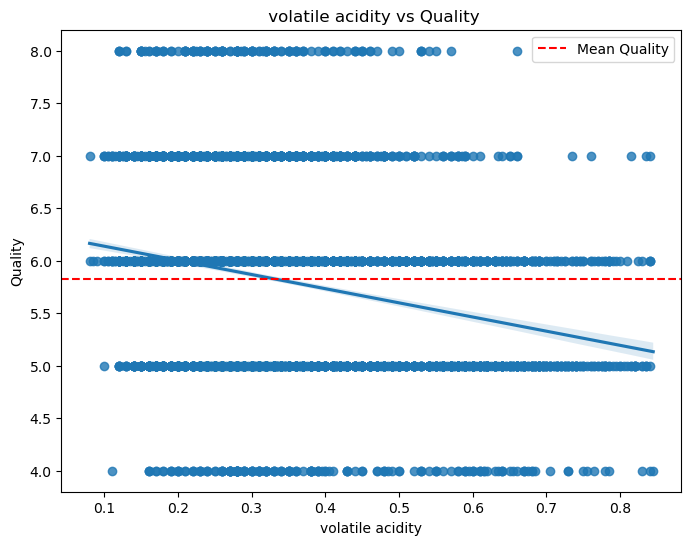

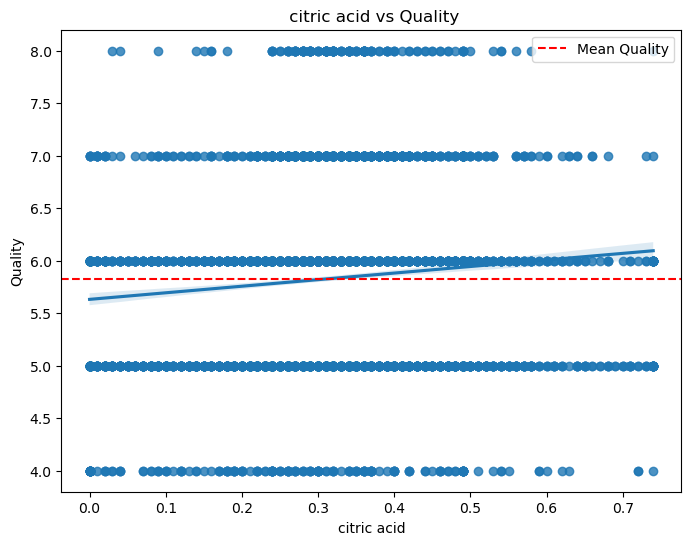

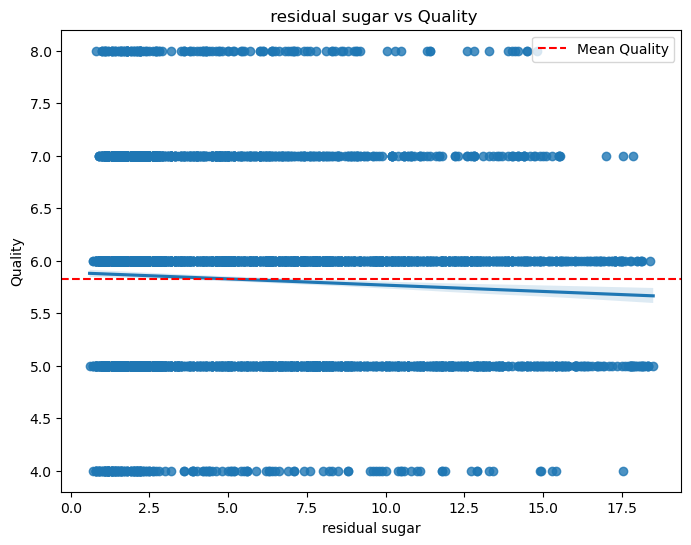

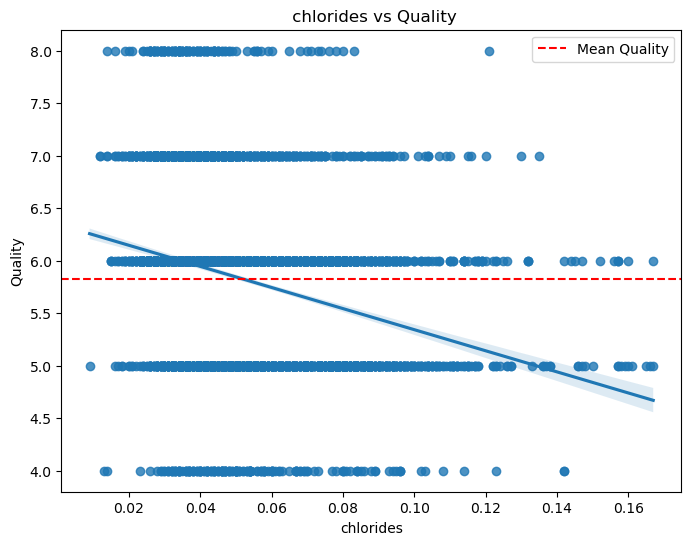

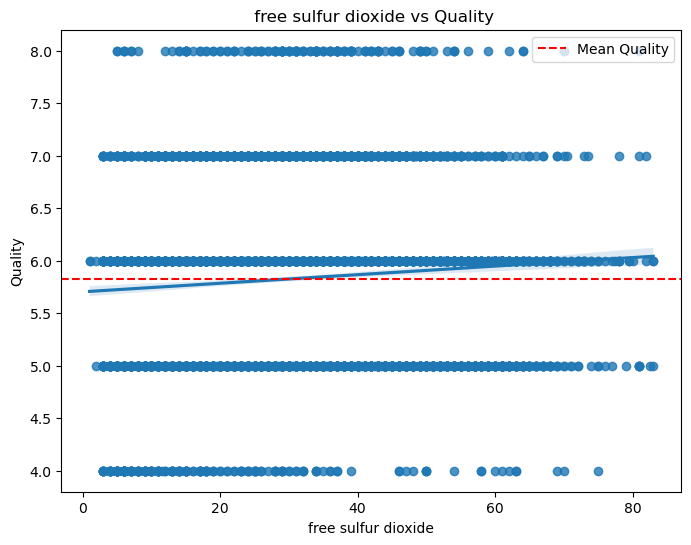

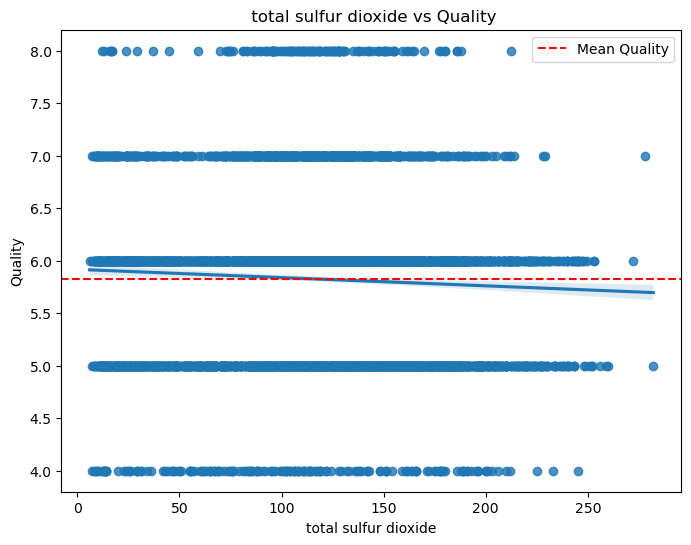

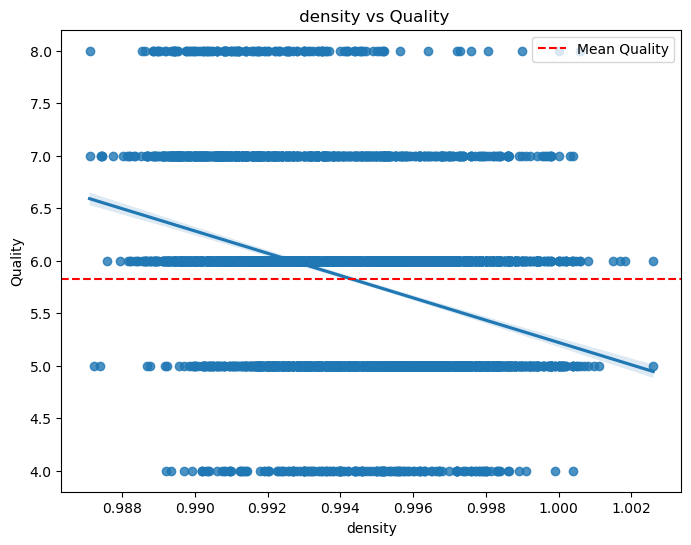

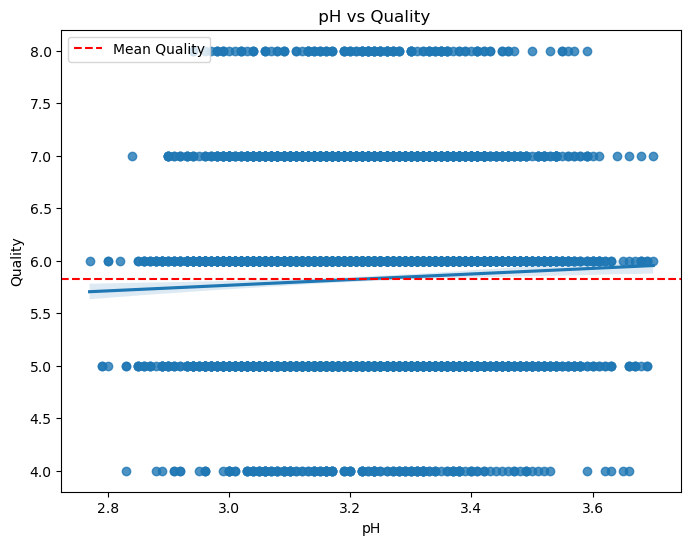

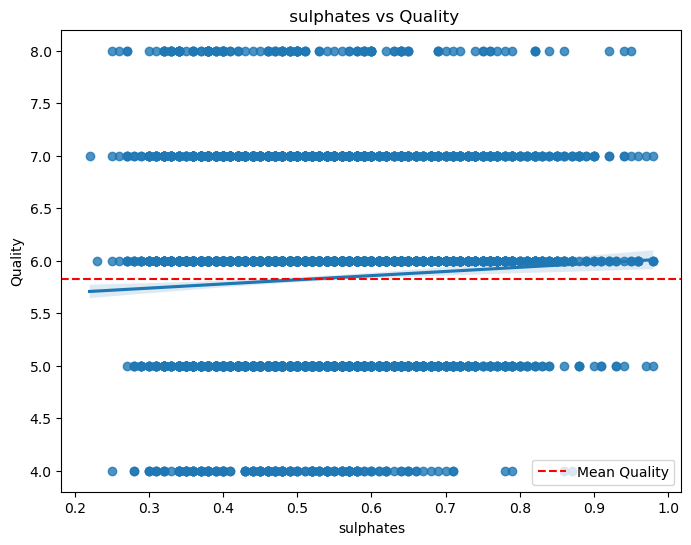

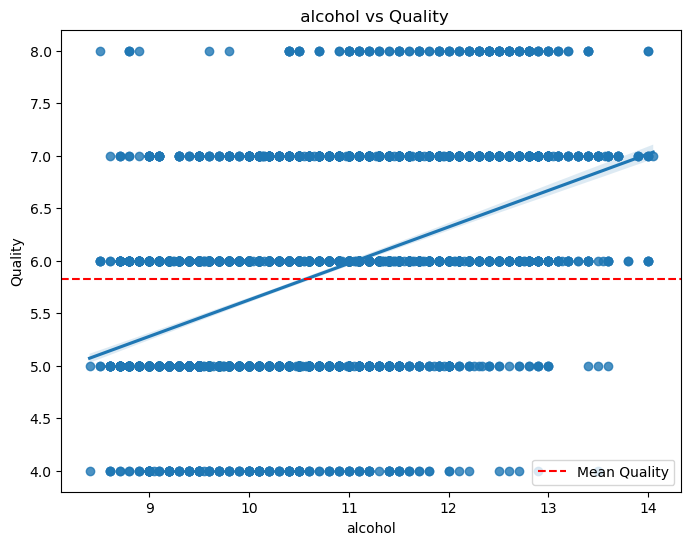

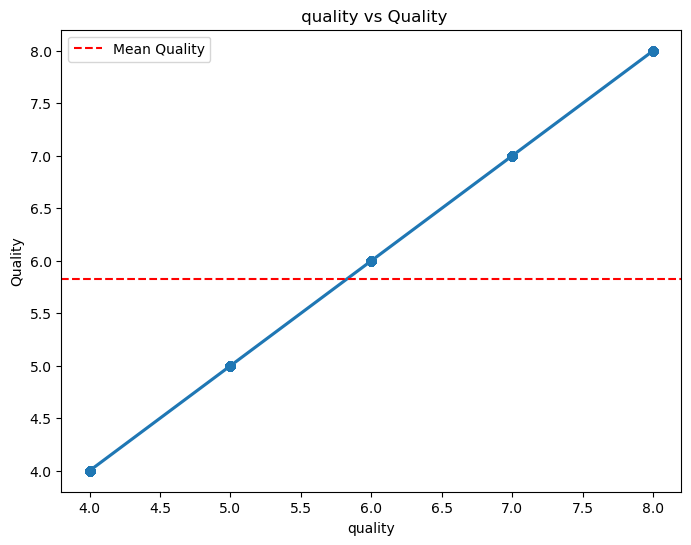

In [64]:
# Loop through each numerical variable (chemical properties) to create reg plots against 'quality' (y)
for feature in df_numerical_var:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df_numerical_var[feature], y=df_numerical_var['quality'])
    plt.title(f' {feature} vs Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')
    plt.axhline(y=df_numerical_var['quality'].mean(), color='r', linestyle='--', label='Mean Quality')
    plt.legend()
    plt.show()


***Interpreting the regplot*** 

The chemical properties that shows a positive relationship with quality are: 
- alcohol
- residual sugar - 
- total sulfur dioxide
- sulphate
- ph
- free sulfur dioxide
- citric acid

### Data Transformation

#### Apply one hot encoding to wine colour column 
I applied One-hot encoding to the ‘wine colour’ column, which is a column created previously in order to identify the wine type. It was decided to apply one-hot encoding because we are dealing with a categorical variable, and it is essential to transform it into a numerical format suitable for machine learning algorithms.

In [68]:
# Apply one-hot encoding to the 'wine_colour' column
wine_colour_encoded = pd.get_dummies(df_white_red, columns=['Wine colour'])

wine_colour_encoded

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine colour_red,Wine colour_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True,False
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,False,True
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,False,True
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,False,True
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,False,True


#### Creating bins in the quality variable (target variable) 

The quality column is a rating scale between 0 to 10. in order to make our prediction more intuitive, i decided to separate the rating scale into the followings:
- Low: 0 - 3
- Medium: 4 -7
- High: 8 - 10

In [71]:
# creating the bins using pd.cut 

bins = [0, 3, 7, 10]  # Edges of the bins 
labels = ['low', 'medium', 'high']  # Labels

wine_colour_encoded['quality'] = pd.cut(wine_colour_encoded['quality'], bins=bins, labels=labels) 



In [72]:
# using label encoder i encoded the quality 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'quality' column
label_encoder.fit_transform(wine_colour_encoded['quality']) 



array([2, 2, 2, ..., 2, 2, 2])

In [73]:
wine_colour_encoded

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine colour_red,Wine colour_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,medium,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,medium,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,medium,True,False
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,medium,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,medium,False,True
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,medium,False,True
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,medium,False,True
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,medium,False,True


In [74]:
wine_colour_encoded['quality']

0       medium
1       medium
2       medium
3       medium
4       medium
         ...  
5315    medium
5316    medium
5317    medium
5318    medium
5319    medium
Name: quality, Length: 5320, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

### Selecting relevant features to train the model 

From the EDA, it was found that some chemical properties influece wine quality more than others. In order to avoid data leakage, and to build the model using the relevant features we first select the relevant features and then we proceed with Train-test-split 

In [77]:
#select relevant vriables from our dataset
features =wine_colour_encoded[['citric acid','residual sugar', 'free sulfur dioxide', 
                     'total sulfur dioxide', 'pH', 
                     'sulphates', 'alcohol', 'Wine colour_red', 'Wine colour_white']]

In [78]:
features

,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,Wine colour_red,Wine colour_white
0,0.00,1.9,11.0,34.0,3.51,0.56,9.4,True,False
1,0.00,2.6,25.0,67.0,3.20,0.68,9.8,True,False
2,0.04,2.3,15.0,54.0,3.26,0.65,9.8,True,False
3,0.56,1.9,17.0,60.0,3.16,0.58,9.8,True,False
4,0.00,1.8,13.0,40.0,3.51,0.56,9.4,True,False
...,...,...,...,...,...,...,...,...,...
5315,0.29,1.6,24.0,92.0,3.27,0.50,11.2,False,True
5316,0.36,8.0,57.0,168.0,3.15,0.46,9.6,False,True
5317,0.19,1.2,30.0,111.0,2.99,0.46,9.4,False,True
5318,0.30,1.1,20.0,110.0,3.34,0.38,12.8,False,True


### Train test split

In [80]:
X = features
y = wine_colour_encoded['quality']

In [81]:
print(y)

0       medium
1       medium
2       medium
3       medium
4       medium
         ...  
5315    medium
5316    medium
5317    medium
5318    medium
5319    medium
Name: quality, Length: 5320, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


In [82]:
print(X)

      citric acid  residual sugar  free sulfur dioxide  total sulfur dioxide  \
0            0.00             1.9                 11.0                  34.0   
1            0.00             2.6                 25.0                  67.0   
2            0.04             2.3                 15.0                  54.0   
3            0.56             1.9                 17.0                  60.0   
4            0.00             1.8                 13.0                  40.0   
...           ...             ...                  ...                   ...   
5315         0.29             1.6                 24.0                  92.0   
5316         0.36             8.0                 57.0                 168.0   
5317         0.19             1.2                 30.0                 111.0   
5318         0.30             1.1                 20.0                 110.0   
5319         0.38             0.8                 22.0                  98.0   

        pH  sulphates  alcohol  Wine co

In [83]:
# let's check the shape of the X and y
print(X.shape)
print(y.shape)

(5320, 9)
(5320,)


In [89]:
# Train test split using sklearn model train_test_split
# the training portion is 80% and testing portion is 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [91]:
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (4256, 9) (4256,)
Testing set: (1064, 9) (1064,)


### Feature Scaling 

Feature scaling is used on the training data in order to ensure that all numerical features contribute equally to the model. 


In [94]:
#scaling using MinMaxScaler as the data do not follow a normal distribution
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


### Oversampling 

Since there is a strong class imbalance, where the Medium class has more observations,compared to the Low and Hight, it is important to balance all the classes. 
I decided to do oversampling to increase the number of instances in the minority classes

In [97]:
from imblearn.over_sampling import RandomOverSampler


# Initialize the oversampler
oversampler = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
from collections import Counter
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))


Original class distribution: Counter({'medium': 4110, 'high': 122, 'low': 24})
Resampled class distribution: Counter({'medium': 4110, 'low': 4110, 'high': 4110})


# Model experimentation <a name="paragraph5"></a>

The following models were used for model experimentation:
- Logistic Regression
- SVC
- Decision Tree
- KNN
- Random Forest

We will particularly focus on logistic regression model and Random Forest model. 

In [100]:
#putting models in a dict in order to easily loop through each model 

ML_models = {
    'LogR': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'SVR': SVC(),
    'Random forest': RandomForestClassifier(),
}

In [101]:
# The function fit_and_evaluate literally fit and evaluate the models in the ML_model disctionary 

def fit_evaluate(ML_models, X_train, X_test, y_train, y_test):
    # Setting random seed
    np.random.seed(42)
    # Making a dictionary to keep the scores of the models
    scores = {}
    # Looping through models
    for name, model in ML_models.items(): # take the name of the model and the respectiv emodel 
        model.fit(X_train_resampled, y_train)# fitting the models in the training data 

    #Evaluating the model using the test data and append its score to model_scores
        scores[name] = model.score(X_test_scaled, y_test) # the .score method returns the accuracy of the model, which is the proportion of correctly predicted instances out of the total instances in the test set.
    return scores

In [102]:
model_scores = fit_evaluate(ML_models=ML_models, X_train=X_train_resampled, X_test=X_test_scaled, y_train=y_train_resampled, y_test=y_test)

model_scores

C:\Users\wendy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogR': 0.4041353383458647,
 'KNN': 0.9107142857142857,
 'tree': 0.9511278195488722,
 'SVR': 0.6625939849624061,
 'Random forest': 0.9661654135338346}

### Hyperparameter Tuning for Logistic Regression

In [104]:
# importing RandomizedSearchCV to do random search method for hyperarameter tuning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score # this is used for evaluating the accuracy of the predictions made by the model
param_dist = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

random_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=5000, random_state=42),
    param_distributions=param_dist,
    n_iter=5,
    cv=10,
    random_state=42,
    n_jobs=-1
)
# Fitting  the RandomizedSearchCV to the data
random_search.fit(X_train_resampled, y_train_resampled)

#getting the best estimator
best_logreg = random_search.best_estimator_
best_params = random_search.best_params_ #get the best parameter 
print(f'Best Parameters: {best_params}')

best_model = random_search.best_estimator_ #get the best estimator

y_pred = best_model.predict(X_test_scaled) #predict on the test using the best model 

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy}')


Best Parameters: {'solver': 'liblinear', 'C': 100}
Accuracy on the test set: 0.35902255639097747


In [105]:
# Calculating precision, recall, and F1 score for logistic regression model
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.94
Recall: 0.36
F1 Score: 0.50


Before tuning 40% of the predictions made by the model on the test set were correct, while after the tuning, there has been a slight decrease in accuracy (36%), suggesting that the model had a decrease in accuracy after tuning. 
***Precision*** 
Precision indicates how many of the predicted positive instances were actually positive. A precision of 94% means that the model predicts a positive class, it is correct 94% of the time. This is very high, indicating that the model is good at identifying the positive class among the predicted positives.
***Recall***
However, the recall (measures the model’s ability to capture all the actual positive instances) shows that the model only identified 36% of the actual positives in the test set. This indicates a significant number of actual positives were missed (false negatives).
***F1 Score***
The F1 score is the harmonic mean of precision and recall. It provides a single score that balances. The score of  0.50 indicates a moderate balance between precision and recall, but it suggests that the model might be struggling to capture the positive class effectively.


### Hyperparameter Tuning for Random Forest

In [108]:

# The dictionary was created for definng the parameter to sample from

param_dist = {
    'n_estimators': [236, 240, 242],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 25],           # Maximum depth of the trees
    'min_samples_split': randint(2, 11),       # Minimum samples required to split an internal node (2-10)
    'min_samples_leaf': randint(1, 5)          # Minimum number of samples required to be at a leaf node (1-4)
}

# Instantiating the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV with the classifier and parameter distribution
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, 
                                   n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fitting  the RandomizedSearchCV to the data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = random_search.best_params_
print(f'Best Parameters: {best_params}')

# Get the best estimator 
best_model = random_search.best_estimator_

# Predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy}')


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 236}
Accuracy on the test set: 0.9652255639097744


In [109]:
# Classification Report 
print('Classification Report:')
print(classification_report(y_test, y_pred,zero_division=1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

        high       0.67      0.06      0.12        31
         low       0.00      0.00      0.00         6
      medium       0.97      1.00      0.98      1027

    accuracy                           0.97      1064
   macro avg       0.54      0.35      0.37      1064
weighted avg       0.95      0.97      0.95      1064

Confusion Matrix:
[[   2    0   29]
 [   0    0    6]
 [   1    1 1025]]


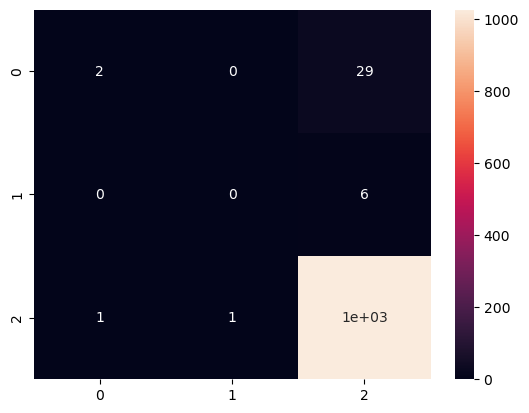

In [110]:
sns.heatmap(conf_matrix,annot=True);
